<a href="https://colab.research.google.com/github/lauraAriasFdez/barcodeDetector/blob/main/test_weights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# clone YOLOv4 repository
!git clone https://github.com/AlexeyAB/darknet

# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

# make darknet 
#(builds darknet so that you can then use the darknet executable file to run or train object detectors)
!make

In [2]:
# MAIN DIRECTORY STILL TO DO 
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [10]:
!ln -s content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

'Colab Notebooks'       internship_decline.gdoc
 CSCI3081W	       'My Drive'
 CSCI4511W	        PUBH1001
 csci5512_hw2_2c.gdoc  'Resume - Laura Arias Fernandez (1).docx'
 Documents	        UROP
 Essay.gdoc	        wahuRoom
 GRE


In [11]:
# add the config that I have alreaded back here
!cp /mydrive/UROP/yolov4_dataset/yolov4-custom.cfg /content/darknet/cfg/yolov4-custom.cfg

In [12]:
# Create an obj.names and obj.data files in google drive 
!cp /mydrive/UROP/yolov4_dataset/obj.names ./data
!cp /mydrive/UROP/yolov4_dataset/obj.data ./data

# Run Obj Detector


In [13]:
# need to set our custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov4-obj.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov4-obj.cfg
%cd ..

/content/darknet/cfg
sed: can't read yolov4-obj.cfg: No such file or directory
sed: can't read yolov4-obj.cfg: No such file or directory
/content/darknet


In [17]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()


In [22]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test ./data/obj.data ./cfg/yolov4-custom.cfg ../gdrive/MyDrive/UROP/yolov4_dataset/backup/yolov4-custom_best.weights ../gdrive/MyDrive/UROP/yolov4_dataset/img/veg.jfif -thresh 0.3


 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF

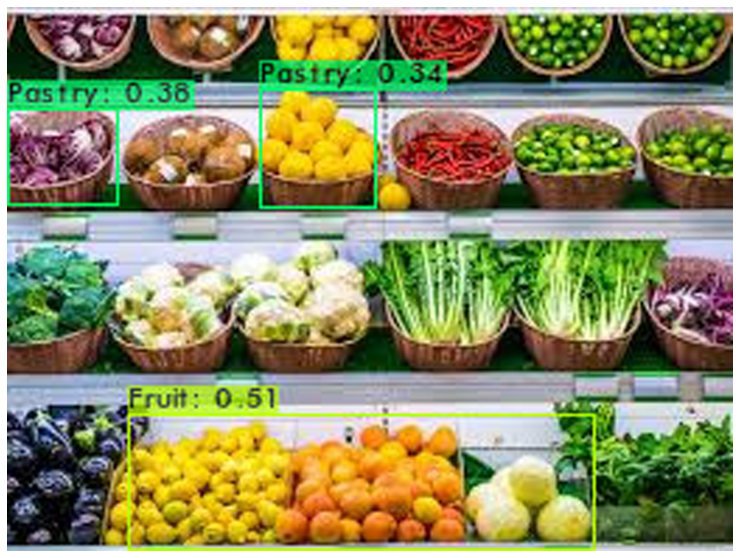

In [23]:
imShow("predictions.jpg")